<a href="https://colab.research.google.com/github/politeles/audio_classification/blob/main/VADSDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration
This notebook explores the data contained in the dataset VADS.
Violin Audio Dataset wich contains 1 second samples sounds of different techniques performed on the violin like pizzicato, martelé, etc.

In [ ]:
pip install datasets[audio]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whic

In [ ]:
from datasets import load_dataset

In [ ]:
from datasets import load_dataset

In [ ]:
vads = load_dataset("politeles/vads")

README.md:   0%|          | 0.00/898 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/227M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2515 [00:00<?, ? examples/s]

In [ ]:
vads

DatasetDict({
    train: Dataset({
        features: ['audio', 'technique', 'microphone', 'string', 'note'],
        num_rows: 2515
    })
})

In [ ]:
vads['train'].features

{'audio': Audio(sampling_rate=48000, mono=True, decode=True, id=None),
 'technique': ClassLabel(names=['bariolage', 'chords', 'doublestops', 'legato', 'martele', 'pizz', 'ricochet', 'spicatto', 'sulponticello'], id=None),
 'microphone': ClassLabel(names=['rodemic', 's10left', 's10right', 's22ultra', 'thomannmic'], id=None),
 'string': Value(dtype='string', id=None),
 'note': Value(dtype='string', id=None)}

In [ ]:
import pandas as pd

In [ ]:
df_pandas = pd.DataFrame(vads['train'])

In [ ]:
df_pandas.describe()

,technique,microphone
count,2515.000000,2515.000000
mean,4.614314,2.000000
std,2.750995,1.414495
min,0.000000,0.000000
25%,2.000000,1.000000
50%,5.000000,2.000000
75%,7.000000,3.000000
max,8.000000,4.000000


In [ ]:
id2label_fn = vads["train"].features["technique"].int2str

In [ ]:
id2labelmf_fn = vads["train"].features["microphone"].int2str

In [ ]:
id2label_fn(vads['train'][0]['technique'])

'bariolage'

In [ ]:
df_pandas['tecnique'] = df_pandas['technique'].apply(id2label_fn)

In [ ]:
df_pandas['mic'] = df_pandas['microphone'].apply(id2labelmf_fn)

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of Elements per Technique')

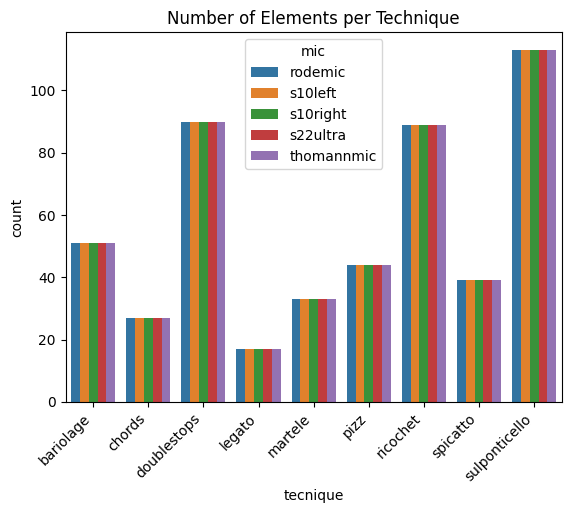

In [ ]:
g = sns.countplot(data=df_pandas,x="tecnique", hue="mic")
plt.xticks(rotation=45, ha='right')
plt.title('Number of Elements per Technique')

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

False
0
